In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/NCKH Depression/Dataset'
!ls

/content/drive/MyDrive/NCKH Depression/Dataset
'Education test.xlsx'   Family.xlsx	  Love.xlsx	   'Working test.xlsx'
 Education.xlsx         Intro.xlsx	 'Self test.xlsx'   Working.xlsx
'Family test.xlsx'     'Love test.xlsx'   Self.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Step 1: Import, preprocess.

In [ ]:
data = pd.read_excel('Working.xlsx')
data.head()

,Họ và tên bạn là gì?,Ngày sinh của bạn là?,Hiện tại bạn là?,Giới tính sinh học của bạn là:,Bạn có thuộc cộng đồng LGBT không?,1. Bạn là người có xu hướng:,2. Bạn có cảm thấy bản thân mình thừa thãi không?,"3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?",4. Bạn đang tự ti?,"5. Bạn có hay vận động thể dục, thể thao không?",...,"1. Bạn đột nhiên ăn quá nhiều hoặc chán ăn, biếng ăn?","2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?","3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?","4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?",5. Bạn không thể tập trung khi làm việc?,"6. Bạn mất tự tin vào bản thân, thất vọng về bản thân và cả gia đình?","7. Bạn luôn cảm thấy chán nản, kiệt sức, tuyệt vọng?",8. Bạn ít thấy hứng thú hoặc không tìm thấy niềm vui trong mọi việc?,"9. Bạn có suy nghĩ tiêu cực, muốn làm tổn thương bản thân thậm chí có suy nghĩ tự sát?",Tổng điểm
0,Nguyễn Vũ Anh Kiệt,2003-06-30 00:00:00,Sinh viên năm 1,Nam,Có,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Có,Có,...,0.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,10.0
1,Nguyễn Anh Thắng,2003-06-09 00:00:00,Sinh viên năm 1,Nam,Không,Hướng ngoại,Một chút,Một chút,Một chút,Có,...,2.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,9.0
2,Trần Xuân Trường,1999-06-29 00:00:00,Đã tốt nghiệp.,Nam,Có,Hướng nội,Một chút,Không,Có,Có,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.0,15.0
3,Nguyễn Thùy Giang,2001-06-17 00:00:00,Sinh viên năm 3,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Không,Một chút,Không,Không,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0
4,Trần Văn Khải,2002-08-15 00:00:00,Sinh viên năm 2,Nam,Không,Hướng ngoại,Không,Không,Không,Có,...,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0


In [ ]:
data.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

$Data$ $Preprocessing$

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
data.Total = data.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})


# Change values in job column from Sinh vien trung cap to Trung cap nghe
data.Job = data.Job.replace({'Học sinh cấp 3': 0,
                             'Sinh viên trung cấp': 1,
                             'Sinh viên năm 1': 2,
                             'Sinh viên năm 2': 3,
                             'Sinh viên năm 3': 4,
                             'Sinh viên năm 4': 5,
                             'Sinh viên từ năm 4 trở lên': 6,
                             'Đã tốt nghiệp.': 7})

data.a2 = data.a2.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a3 = data.a3.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a4 = data.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
data.b15 = data.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng 5 lần': 2, 
                             'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

# Fill null value with the most popular value.
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Drop the column Name
data = data.drop(columns=[ 'Name', 'DoB', 'b4','Sex', 'LGBT','a1', 'a5', 'a6', 'a7', 
                          'a8','b1', 'b2', 'b3', 'b7', 'b8', 'b11', 'b12', 'b10',
                          'b4', 'Job', 'b9', 'a3', 'a4','b13','b15'])

# Step 2: Traing dataset.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,a2,b5,b6,b14,c1,c2,c3,c4,c5,c6,c7,c8,c9,Total
a2,1.00,0.15,-0.16,0.31,0.26,0.36,0.33,0.34,0.35,0.45,0.42,0.41,0.40,0.52
b5,0.15,1.00,-0.01,0.19,0.16,0.15,0.12,0.17,0.12,0.15,0.13,0.13,0.13,0.20
b6,-0.16,-0.01,1.00,-0.01,-0.06,-0.16,-0.12,-0.16,-0.07,-0.13,-0.15,-0.14,-0.07,-0.17
b14,0.31,0.19,-0.01,1.00,0.22,0.29,0.22,0.23,0.33,0.36,0.36,0.27,0.21,0.38
c1,0.26,0.16,-0.06,0.22,1.00,0.39,0.45,0.35,0.31,0.45,0.44,0.36,0.44,0.60
c2,0.36,0.15,-0.16,0.29,0.39,1.00,0.49,0.54,0.58,0.51,0.60,0.56,0.37,0.73
c3,0.33,0.12,-0.12,0.22,0.45,0.49,1.00,0.45,0.44,0.45,0.44,0.43,0.40,0.67
c4,0.34,0.17,-0.16,0.23,0.35,0.54,0.45,1.00,0.50,0.56,0.56,0.59,0.41,0.71
c5,0.35,0.12,-0.07,0.33,0.31,0.58,0.44,0.50,1.00,0.48,0.55,0.57,0.37,0.69
c6,0.45,0.15,-0.13,0.36,0.45,0.51,0.45,0.56,0.48,1.00,0.68,0.62,0.55,0.77


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a2      330 non-null    float64
 1   b5      330 non-null    float64
 2   b6      330 non-null    float64
 3   b14     330 non-null    float64
 4   c1      330 non-null    float64
 5   c2      330 non-null    float64
 6   c3      330 non-null    float64
 7   c4      330 non-null    float64
 8   c5      330 non-null    float64
 9   c6      330 non-null    float64
 10  c7      330 non-null    float64
 11  c8      330 non-null    float64
 12  c9      330 non-null    float64
 13  Total   330 non-null    float64
dtypes: float64(14)
memory usage: 36.2 KB


In [ ]:
array = data.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape, X_validation.shape

((264, 13), (66, 13))

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

## Models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.886610 (0.049952)
LDA: 0.928205 (0.045820)
KNN: 0.761966 (0.108278)
CART: 0.648291 (0.061934)
NB: 0.825926 (0.047360)
SVM: 0.874786 (0.091220)


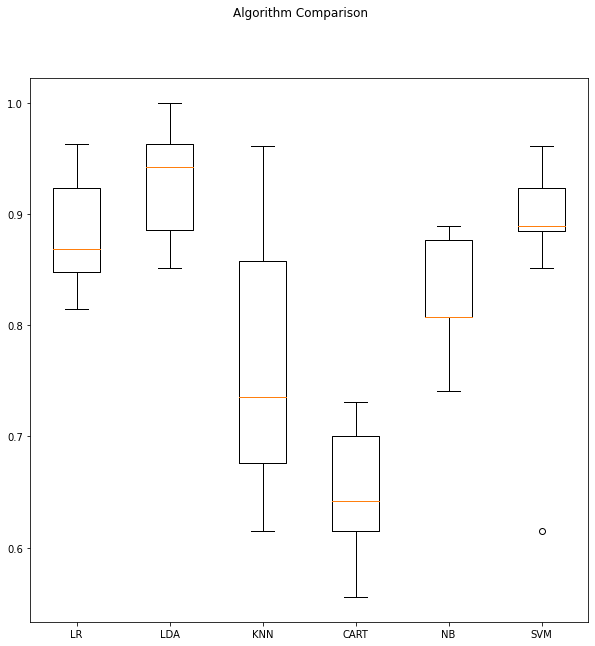

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.901567 (0.048586)
ScaledLDA: 0.928205 (0.045820)
ScaledKNN: 0.772934 (0.058092)
ScaledCART: 0.641026 (0.065036)
ScaledNB: 0.825926 (0.047360)
ScaledSVM: 0.871510 (0.078168)


In [ ]:
# LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
shrinkage_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.05,0.25,
                    0.15,0.35,0.45,0.55,0.65,0.75, 0.85,0.95]
solver_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(shrinkage=shrinkage_values, solver = solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924359 using {'shrinkage': 0.05, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.916667 (0.053145) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.916667 (0.053145) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.909117 (0.048625) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.909117 (0.048625) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.912963 (0.051038) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.912963 (0.051038) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.898006 (0.053377) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.898006 (0.053377) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.890313 (0.062318) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.890313 (0.062318) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_

In [ ]:
# LR
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'elasticnet', 'l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(solver= solver, penalty = penalty, C = C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Best: 0.947293 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909259 (0.034584) with: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
0.912963 (0.045107) with: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.001, 'penalty': 'none', 'solver': 'liblinear'}
0.939886 (0.033709) with: {'C': 0.001, 'penalty': 'none', 'solver': 'sag'}
0.939744 (0.029615) with: {'C': 0.001, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.166239 (0.071473) with: {'C': 0.001, 'penal

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.90925926 0.91296296        nan 0.93988604 0.93974359        nan
        nan        nan        nan        nan        nan        nan
 0.16623932        nan 0.34088319 0.35213675 0.35213675 0.48917379
 0.35213675 0.35213675 0.90925926 0.91296296        nan 0.93988604
 0.93974359        nan        nan        nan        nan        nan
        nan        nan 0.16623932        nan 0.34088319 0.5537037
 0.5537037  0.52692308 0.5537037  0.5537037  0.90925926 0.91296296
        nan 0.93988604 0.93974359        nan        nan        nan
        nan        nan        nan        nan 0.56082621        nan
 0.62905983 0.76524217 0.76524217 0.57222222 0.76524217 0.76524217
 0.90925926 0.91296296        nan 0.93988604 0.93974359        nan
        nan        nan        nan        nan        nan        nan
 0.65940171        nan 0.90584046 0.90156695 0.90156695 0.

In [ ]:
# SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.935613 using {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.367664 (0.090555) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.375356 (0.079701) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.856125 (0.065474) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.833333 (0.072650) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.340883 (0.073212) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.401709 (0.059924) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.886325 (0.029503) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.932051 (0.032446) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.855983 (0.068107) with: {'C': 10, 'gamma': 0.001, 'ke

## Ensembles

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.489601 (0.107240)
GBM: 0.742450 (0.092192)
RF: 0.784615 (0.095392)
ET: 0.818661 (0.103099)


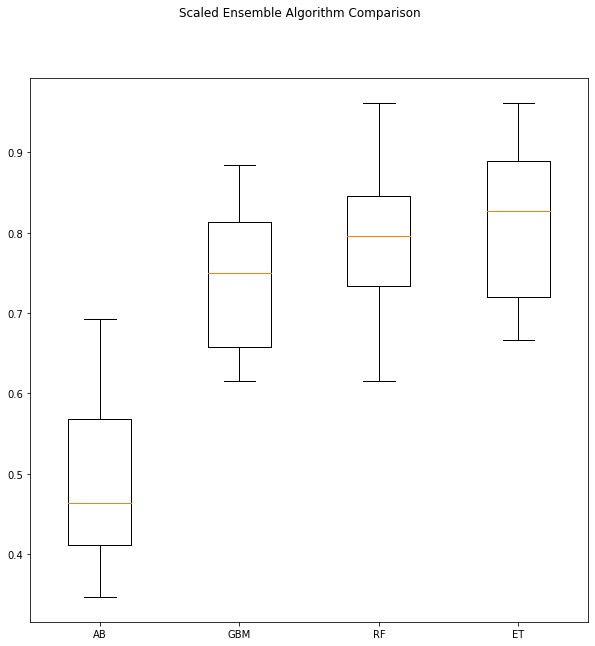

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400, 500, 450, 390, 410]))
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837179 using {'n_estimators': 250}
0.814957 (0.073169) with: {'n_estimators': 50}
0.829487 (0.080062) with: {'n_estimators': 100}
0.814672 (0.066844) with: {'n_estimators': 150}
0.826068 (0.062501) with: {'n_estimators': 200}
0.837179 (0.065447) with: {'n_estimators': 250}
0.821937 (0.056353) with: {'n_estimators': 300}
0.829630 (0.051005) with: {'n_estimators': 350}
0.833476 (0.053495) with: {'n_estimators': 400}
0.818376 (0.059663) with: {'n_estimators': 500}
0.833333 (0.059003) with: {'n_estimators': 450}
0.829772 (0.053377) with: {'n_estimators': 390}
0.833476 (0.053495) with: {'n_estimators': 410}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799858 using {'n_estimators': 65}
0.795869 (0.085273) with: {'n_estimators': 35}
0.796011 (0.089274) with: {'n_estimators': 40}
0.776781 (0.090478) with: {'n_estimators': 45}
0.792023 (0.091594) with: {'n_estimators': 55}
0.788319 (0.105807) with: {'n_estimators': 60}
0.799858 (0.102865) with: {'n_estimators': 65}
0.792165 (0.095899) with: {'n_estimators': 50}
0.784330 (0.097599) with: {'n_estimators': 48}
0.788319 (0.097499) with: {'n_estimators': 49}
0.788319 (0.097499) with: {'n_estimators': 51}
0.795869 (0.095874) with: {'n_estimators': 52}


# Step 3: Training - Testing

## LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver='lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelLDA.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9696969696969697
0.9242424242424242
[[11  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  2  6  0  0]
 [ 0  0  1 14  0]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.89      1.00      0.94        24
         2.0       0.86      0.75      0.80         8
         3.0       0.93      0.93      0.93        15
         4.0       1.00      0.86      0.92         7

    accuracy                           0.92        66
   macro avg       0.94      0.89      0.91        66
weighted avg       0.93      0.92      0.92        66



## SVM

In [ ]:
modelSVM= SVC(C = 1000, gamma = 0.0001, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelSVM.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9659090909090909
0.9242424242424242
[[11  1  0  0  0]
 [ 1 23  0  0  0]
 [ 0  2  6  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.88      0.96      0.92        24
         2.0       1.00      0.75      0.86         8
         3.0       0.94      1.00      0.97        15
         4.0       1.00      0.86      0.92         7

    accuracy                           0.92        66
   macro avg       0.95      0.90      0.92        66
weighted avg       0.93      0.92      0.92        66



## LG

In [ ]:
modelLG= LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
modelLG.fit(X_train, Y_train)
predictions = modelLG.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelLG.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9962121212121212
0.9696969696969697
[[12  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  1  7  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0  7]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       0.96      0.96      0.96        24
         2.0       1.00      0.88      0.93         8
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00         7

    accuracy                           0.97        66
   macro avg       0.98      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



## ET

In [ ]:
modelET= ExtraTreesClassifier(n_estimators= 250)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelET.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.8787878787878788
[[11  1  0  0  0]
 [ 0 23  1  0  0]
 [ 0  2  5  1  0]
 [ 0  0  2 13  0]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.88      0.96      0.92        24
         2.0       0.62      0.62      0.62         8
         3.0       0.87      0.87      0.87        15
         4.0       1.00      0.86      0.92         7

    accuracy                           0.88        66
   macro avg       0.88      0.84      0.86        66
weighted avg       0.88      0.88      0.88        66



## RF

In [ ]:
modelRF= RandomForestClassifier(n_estimators = 65)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelRF.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.8636363636363636
[[11  1  0  0  0]
 [ 0 23  1  0  0]
 [ 0  3  5  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  2  5]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.85      0.96      0.90        24
         2.0       0.62      0.62      0.62         8
         3.0       0.87      0.87      0.87        15
         4.0       1.00      0.71      0.83         7

    accuracy                           0.86        66
   macro avg       0.87      0.82      0.84        66
weighted avg       0.87      0.86      0.86        66



# Testing

## Prepare dataset

In [ ]:
test = pd.read_excel('Working test.xlsx')
test.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,1.0.1,...,2.0.3,3.0.3,4.0.3,5.0.3,6.0.3,7.0.3,8.0.3,9.0.3,1.0.4,2.0.4
0,Nguyễn Phú Thịnh,28/11/2001,Sinh viên năm 3,Nam,Không,Chưa xác định được,Một chút,Không,Có,Một chút,...,2.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,13.0
1,Trần Nhung,26/04/2002,Sinh viên năm 2,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Không,Có,...,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,16.0
2,Hoa Hoàng Trí Phúc,2003-10-09 00:00:00,Sinh viên năm 1,Nam,Không,Vừa hướng nội vừa hướng ngoại,Có,Có,Có,Có,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,27.0
3,Đặng Thành Tài,2001-07-10 00:00:00,Sinh viên năm 3,Nam,Có,Hướng nội,Một chút,Có,Có,Không,...,0.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,7.0
4,Lê Đặng Thủy Vy,17/11/2002,Sinh viên năm 2,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Không,Một chút,Một chút,Không,...,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,13.0


In [ ]:
test.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
test.Total = test.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})

test.a2 = test.a2.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
test.a3 = test.a3.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
test.a4 = test.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
test.b15 = test.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng 5 lần': 2, 
                             'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

# Fill null value with the most popular value.
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Drop the column Name
test = test.drop(columns=[ 'Name', 'DoB', 'b4','Sex', 'LGBT','a1', 'a5', 'a6', 'a7', 
                          'a8','b1', 'b2', 'b3', 'b7', 'b8', 'b11', 'b12', 'b10',
                          'b4', 'Job', 'b9', 'a3', 'a4','b13','b15'])

In [ ]:
array = test.values
x = array[:,0:13]
y = array[:,13]

## Testing model

### RF

In [ ]:
modelRF= RandomForestClassifier(n_estimators = 65)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8035714285714286
[[ 9  4  0  0  0]
 [ 2 30  0  0  0]
 [ 0  4 32  4  0]
 [ 0  0  4 16  4]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75        13
         1.0       0.79      0.94      0.86        32
         2.0       0.89      0.80      0.84        40
         3.0       0.80      0.67      0.73        24
         4.0       0.43      1.00      0.60         3

    accuracy                           0.80       112
   macro avg       0.75      0.82      0.76       112
weighted avg       0.82      0.80      0.80       112



### ET

In [ ]:
modelET= ExtraTreesClassifier(n_estimators= 250)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8214285714285714
[[11  2  0  0  0]
 [ 1 31  0  0  0]
 [ 0  3 31  6  0]
 [ 0  0  4 16  4]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.86      0.97      0.91        32
         2.0       0.89      0.78      0.83        40
         3.0       0.73      0.67      0.70        24
         4.0       0.43      1.00      0.60         3

    accuracy                           0.82       112
   macro avg       0.76      0.85      0.78       112
weighted avg       0.84      0.82      0.82       112



### LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver='lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9196428571428571
[[12  1  0  0  0]
 [ 0 31  1  0  0]
 [ 0  3 34  3  0]
 [ 0  0  1 23  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.89      0.97      0.93        32
         2.0       0.94      0.85      0.89        40
         3.0       0.88      0.96      0.92        24
         4.0       1.00      1.00      1.00         3

    accuracy                           0.92       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.92      0.92      0.92       112



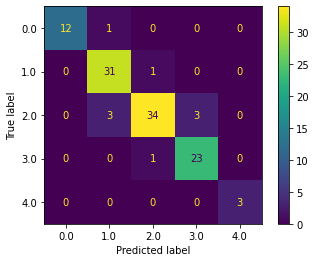

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

cm = confusion_matrix(y, predictions, labels=modelLDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelLDA.classes_)
t=disp.plot()
plt.show()

### SVM

In [ ]:
modelSVM= SVC(C = 1000, gamma = 0.0001, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8839285714285714
[[11  2  0  0  0]
 [ 2 29  1  0  0]
 [ 0  4 35  1  0]
 [ 0  0  2 21  1]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        13
         1.0       0.83      0.91      0.87        32
         2.0       0.92      0.88      0.90        40
         3.0       0.95      0.88      0.91        24
         4.0       0.75      1.00      0.86         3

    accuracy                           0.88       112
   macro avg       0.86      0.90      0.88       112
weighted avg       0.89      0.88      0.88       112



### LG

In [ ]:
modelLG= LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
modelLG.fit(X_train, Y_train)
predictions = modelLG.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9375
[[12  1  0  0  0]
 [ 0 30  2  0  0]
 [ 0  0 39  1  0]
 [ 0  0  1 21  2]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.97      0.94      0.95        32
         2.0       0.93      0.97      0.95        40
         3.0       0.95      0.88      0.91        24
         4.0       0.60      1.00      0.75         3

    accuracy                           0.94       112
   macro avg       0.89      0.94      0.91       112
weighted avg       0.94      0.94      0.94       112

